In [4]:
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer
# Fetch molecular structures and compute fingerprints


df = pd.read_csv("bioactivity_data.csv")


df2 = df[df.standard_value.notna()]
df2

bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])


In [5]:
def compute_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2)  # Morgan fingerprint with radius 2
        return fingerprint
    else:
        return None

df['fingerprint'] = df['canonical_smiles'].apply(compute_fingerprint)
df
# Filter out rows where fingerprint couldn't be computed
#activity_df = activity_df.dropna(subset=['fingerprint'])

# Convert fingerprint to binary representation
#activity_df['fingerprint_binary'] = activity_df['fingerprint'].apply(lambda x: [int(bit) for bit in x])

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,fingerprint
0,NaN,NaN,13352855,[],CHEMBL2399318,Inhibition of full-length human KRas4B (amino ...,B,NaN,NaN,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,155.000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,NaN,NaN,13352856,[],CHEMBL2399319,Inhibition of full-length human KRas4B (amino ...,B,NaN,NaN,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,342.000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,NaN,NaN,14548911,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.200,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,NaN,NaN,14548912,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,NaN,NaN,14548913,[],CHEMBL3223233,Inhibition of recombinant HA-tagged K-Ras G12V...,B,P01116,G12V,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.800,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24920498,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5166128,Inhibition of C-terminal Avi and 6His-tagged h...,B,P01116,G12C,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.117,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
808,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24920499,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5166128,Inhibition of C-terminal Avi and 6His-tagged h...,B,P01116,G12C,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.135,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
809,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24920500,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5166128,Inhibition of C-terminal Avi and 6His-tagged h...,B,P01116,G12C,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.064,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
810,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,24920501,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5166128,Inhibition of C-terminal Avi and 6His-tagged h...,B,P01116,G12C,BAO_0000190,...,GTPase KRas,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.005,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
import numpy as np

df3['fingerprint'] = df3['canonical_smiles'].apply(compute_fingerprint)
df3['standard_value'] = df3['standard_value'].astype(float)
df3['standard_value'] = np.log(df3['standard_value'])
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,fingerprint
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,inactive,11.951180,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,inactive,12.742566,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,intermediate,7.090077,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,inactive,9.210340,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,intermediate,7.495542,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
793,CHEMBL5192093,C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...,active,4.762174,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
794,CHEMBL5190874,C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...,active,4.905275,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
795,CHEMBL5192093,C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...,active,4.158883,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
796,CHEMBL5207711,C=CC(=O)N1CCN2c3ncnc4c(F)c(-c5c(O)cccc5F)c(Cl)...,active,1.609438,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [27]:
flattened_fingerprints = np.array([np.array(fingerprint) for fingerprint in df3['fingerprint']])
print(np.shape(flattened_fingerprints))

# Create a DataFrame with flattened fingerprints
fingerprints_df = pd.DataFrame(flattened_fingerprints)


# Concatenate the fingerprint DataFrame with the target variable
processed_data = pd.concat([df3['standard_value'], df3["canonical_smiles"], fingerprints_df], axis=1)
processed_data


processed_data.to_csv("processed_data.csv")

(798, 2048)


In [8]:
from sklearn.feature_selection import VarianceThreshold
y = processed_data["standard_value"]
X=processed_data.drop(columns=["standard_value"])
variance_filter = VarianceThreshold(threshold=0.8*0.2)

X_filtered = variance_filter.fit_transform(X)# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('correlation coeff is', model.score(X_test, y_test))

Mean Squared Error: 5.049499277632199
R-squared: 0.5504992037100137
correlation coeff is 0.5504992037100137


In [13]:
from sklearn.neural_network import MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('correlation coeff is', model.score(X_test, y_test))

Mean Squared Error: 3.799890344408884
R-squared: 0.6617379978263189
correlation coeff is 0.6617379978263189


0.8841921184964441


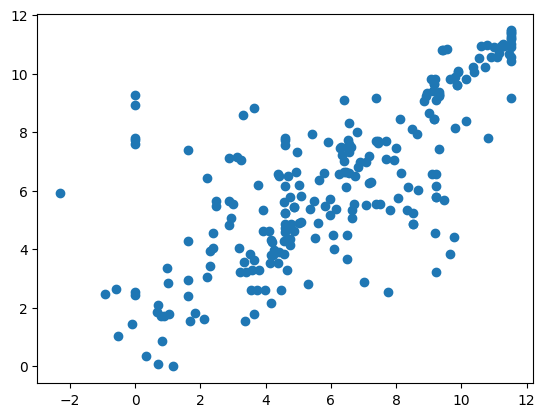

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

pipe = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestRegressor())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
y_pred = pipe.predict(X_test)
plt.scatter(y_test,y_pred)

In [21]:
top_mol = pd.read_csv("top_10_molecules.csv")

print(X_train)

     0     1     2     3     4     5     6     7     8     9     ...  2038  \
412     0     1     0     0     0     0     0     0     0     0  ...     0   
170     0     0     0     0     0     0     0     0     0     0  ...     0   
463     0     0     0     0     0     0     0     0     0     0  ...     0   
472     0     0     0     0     0     0     0     0     0     0  ...     0   
144     0     1     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
686     0     0     0     0     0     0     0     0     0     0  ...     0   
32      0     1     0     0     0     1     0     0     0     0  ...     0   
415     0     1     0     0     0     0     0     0     0     0  ...     0   
74      0     1     0     0     0     1     0     0     0     0  ...     0   
31      0     1     0     0     0     1     0     0     0     0  ...     0   

     2039  2040  2041  2042  2043  2044  2045  2046  2047  
412

In [48]:
mol_processed = pd.read_csv("processed_data.csv")

print(len(mol_processed))

# Filter rows where the "canonical_smiles" column matches the given SMILES string
# Define the SMILES strings
smiles_1 = "C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc(-c4c(O)cccc4F)c(F)cc23)[C@@H](C)C1"
smiles_2 = "C=C(F)C(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN(c2cccc4cccc(Cl)c24)C3)C[C@@H]1CC#N"

# Filter rows where "canonical_smiles" matches either of the specified SMILES strings
filtered_rows = mol_processed[(mol_processed["canonical_smiles"] == smiles_1) | (mol_processed["canonical_smiles"] == smiles_2)]


print(filtered_rows)

# Count rows where the "canonical_smiles" column matches the given SMILES string
rows_count = mol_processed[mol_processed["canonical_smiles"] == "C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc(-c4c(O)cccc4F)c(F)cc23)[C@@H](C)C1"].shape[0]

# Alternatively, using len()
rows_count = len(mol_processed[mol_processed["canonical_smiles"] == "C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc(-c4c(O)cccc4F)c(F)cc23)[C@@H](C)C1"])

print(rows_count)



798
     Unnamed: 0  standard_value  \
166         166        4.219508   
266         266        2.639057   
270         270        1.609438   
286         286        3.401197   
287         287        2.302585   
295         295        9.210340   
778         778        2.267994   

                                      canonical_smiles  0  1  2  3  4  5  6  \
166  C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc...  0  1  0  0  0  0  0   
266  C=C(F)C(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN...  0  0  0  0  0  0  0   
270  C=C(F)C(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN...  0  0  0  0  0  0  0   
286  C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc...  0  1  0  0  0  0  0   
287  C=C(F)C(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN...  0  0  0  0  0  0  0   
295  C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc...  0  1  0  0  0  0  0   
778  C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc...  0  1  0  0  0  0  0   

     ...  2038  2039  2040  2041  2042  2043  2044  2045  2046  2047  
166  ...   

In [72]:
df_with_smiles = mol_processed[(mol_processed["canonical_smiles"] == smiles_1) | (mol_processed["canonical_smiles"] == smiles_2)]

# DataFrame with rows not matching any of the specified SMILES notations
df_extracted_smiles = mol_processed[(mol_processed["canonical_smiles"] != smiles_1) & (mol_processed["canonical_smiles"] != smiles_2)]

# Printing the number of rows
print(f"Rows with the specified SMILES: {df_with_smiles.shape[0]}")
print(f"Rows without the specified SMILES: {df_extracted_smiles.shape[0]}")

Rows with the specified SMILES: 7
Rows without the specified SMILES: 791


In [73]:
df_extracted_smiles

,Unnamed: 0,standard_value,canonical_smiles,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,11.951180,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,12.742566,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,7.090077,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9.210340,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,7.495542,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,793,4.762174,C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
794,794,4.905275,C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
795,795,4.158883,C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
796,796,1.609438,C=CC(=O)N1CCN2c3ncnc4c(F)c(-c5c(O)cccc5F)c(Cl)...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0.9608363908111083
R-squared score on training data: 0.9608363908111083


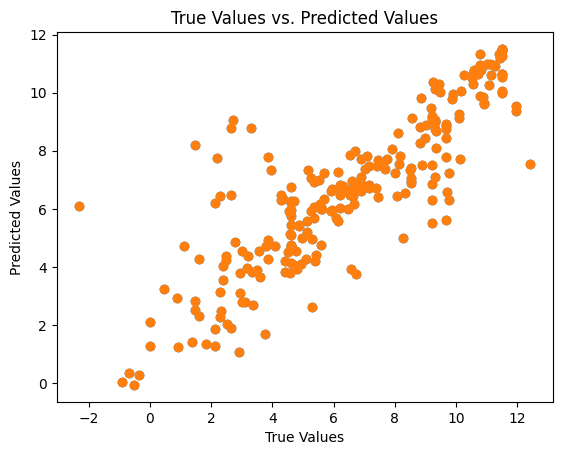

In [101]:
df_with_smiles 
df_extracted_smiles

X = mol_processed.drop(columns=["standard_value", "canonical_smiles"])
y = mol_processed["standard_value"]


pipe = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestRegressor())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
y_pred = pipe.predict(X_test)
plt.scatter(y_test,y_pred)
print("R-squared score on training data:", pipe.score(X_train, y_train))

# Making predictions on the test set
y_pred = pipe.predict(X_test)

# Visualizing the results
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values")
plt.show()


In [102]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np

# Define the SMILES strings
smiles_1 = "C=CC(=O)N1CCN(c2nc(=O)n(-c3c(C)ccnc3C(C)C)c3nc(-c4c(O)cccc4F)c(F)cc23)[C@@H](C)C1"
smiles_2 = "C=C(F)C(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN(c2cccc4cccc(Cl)c24)C3)C[C@@H]1CC#N"

# Convert SMILES strings to RDKit Mol objects
mol_1 = Chem.MolFromSmiles(smiles_1)
mol_2 = Chem.MolFromSmiles(smiles_2)

# Calculate molecular descriptors
desc_1 = np.array([Descriptors.MolWt(mol_1), Descriptors.NumRotatableBonds(mol_1)])
desc_2 = np.array([Descriptors.MolWt(mol_2), Descriptors.NumRotatableBonds(mol_2)])

# Create feature arrays (adjust according to your feature set)
X_1 = desc_1.reshape(1, -1)
X_2 = desc_2.reshape(1, -1)

# Preprocess the feature arrays (e.g., scaling)
X_1_scaled = pipe.named_steps['scaler'].transform(X_1)
X_2_scaled = pipe.named_steps['scaler'].transform(X_2)

# Make predictions
y_pred_1 = pipe.predict(X_1_scaled)
y_pred_2 = pipe.predict(X_2_scaled)

print("Predicted standard value for smiles_1:", y_pred_1)
print("Predicted standard value for smiles_2:", y_pred_2)


c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but StandardScaler is expecting 2049 features as input.

In [99]:
X_special = df_extracted_smiles.drop(columns=["standard_value", "canonical_smiles"])

# Predict using the trained model
y_pred_special = pipe.predict(X_special)

# Since df_without_smiles might have an index or identifier, it's often useful to associate predictions with these identifiers
predictions_df = df_extracted_smiles.assign(predicted_standard_value=y_pred_special)

# If you want to view or use the predictions for the specific canonical smiles
print(predictions_df[['canonical_smiles', 'predicted_standard_value']])

                                      canonical_smiles  \
0                         Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN   
1                         Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN   
2    CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...   
3    CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...   
4    CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...   
..                                                 ...   
793  C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...   
794  C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...   
795  C=CC(=O)N1C[C@H]2COc3c(Cl)c(-c4c(O)cccc4F)c(F)...   
796  C=CC(=O)N1CCN2c3ncnc4c(F)c(-c5c(O)cccc5F)c(Cl)...   
797  C=CC(=O)N1C[C@@H]2CCOc3c(Cl)c(-c4c(O)cccc4F)c(...   

     predicted_standard_value  
0                    9.192173  
1                    9.192173  
2                    7.454335  
3                    8.302451  
4                    7.704382  
..                        ...  
793                  4.837067  
794                  4.809763  
795            

In [89]:
specific_predictions = predictions_df[(predictions_df["canonical_smiles"] == smiles_1) | (predictions_df["canonical_smiles"] == smiles_2)]

# Display the predicted standard values for these specific SMILES strings
print(specific_predictions[['canonical_smiles', 'predicted_standard_value']])

Empty DataFrame
Columns: [canonical_smiles, predicted_standard_value]
Index: []
